In [3]:
%pip install seaborn
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-3-c0fe76faa98a>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Student Performace Report

In this notebook we will explore about multiple factors affecting student performance like hours studied, previous scores, extracurricular activities, sleep hours and sample question paper practiced. 

## About the Dataset

### Description

The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

### Variables
**Hours Studied**: The total number of hours spent studying by each student.  
**Previous Scores**: The scores obtained by students in previous tests.  
**Extracurricular Activities**: Whether the student participates in extracurricular activities (Yes or No).  
**Sleep Hours**: The average number of hours of sleep the student had per day.  
**Sample Question Papers Practiced**: The number of sample question papers the student practiced.

### Target Variable
**Performance Index**: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.  



## Loading the Data

In [12]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 429.8+ KB


## Data Preparation

1. **Data Inspection**:
   - After running `df.describe()` and `df.info()`, we confirmed that there are no missing values in the dataset, so it is ready for processing.

2. **Categorical Variable Encoding**:
   - The column *Extracurricular activities* contains `True`/`False` values.
   - To make this feature compatible with our linear regression model, we'll convert `True` to `1` and `False` to `0`.

3. **Data Normalization**:
   - From `df.describe()`, we observed that the data is not uniform across features.
   - We will apply normalization to ensure all features are on a similar scale, which helps improve the model's performance.


In [13]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [14]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


### Visualizing the Data

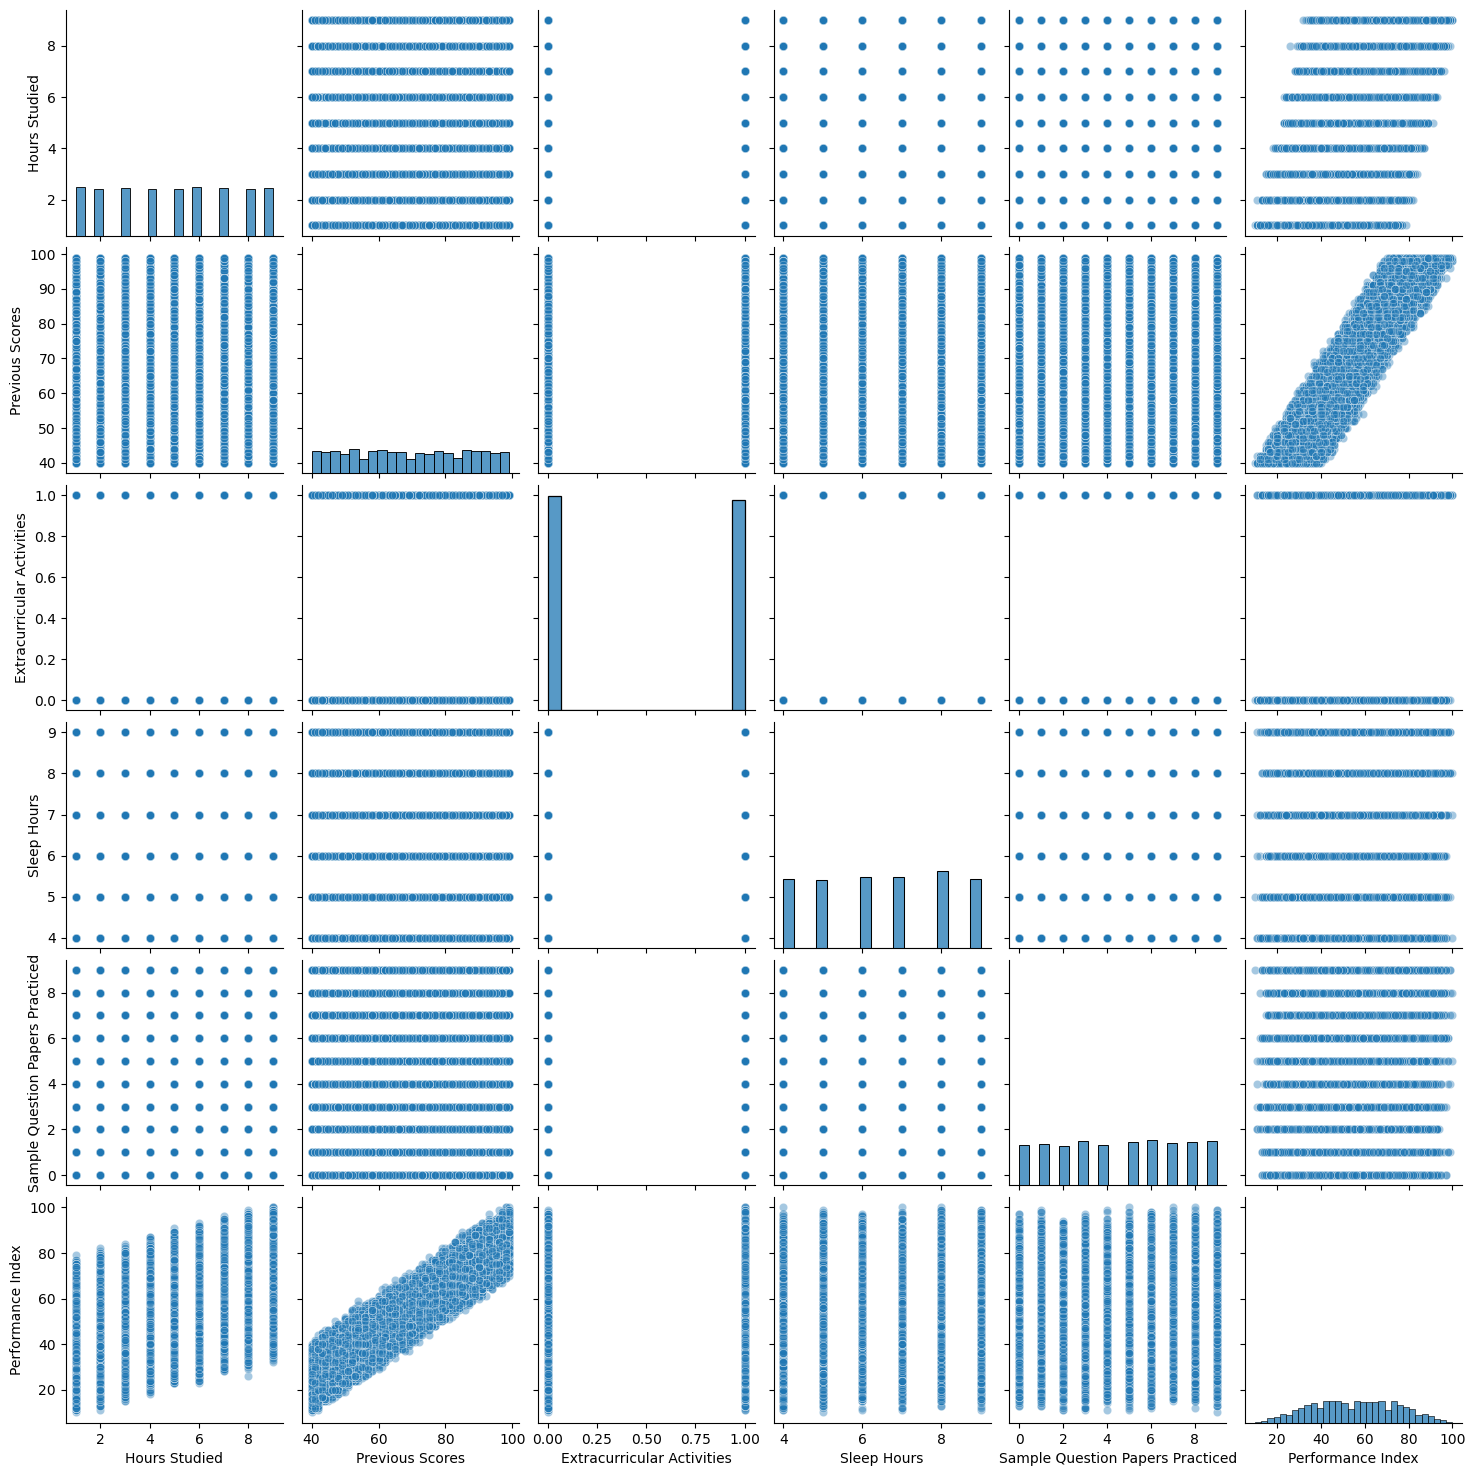

In [21]:
sns.pairplot(df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities' ,'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']], kind='scatter', plot_kws={'alpha': 0.4})

### Relationship Between Previous Scores and Performance Index

From the visualizations and the correlation analysis, we can observe that both **Previous Scores** and **Hours Studied** have a **linear relationship** with the **Performance Index**. This suggests that as the previous scores and hours studied increase, the performance index also tends to increase in a predictable manner. These linear relationships indicate that both **Previous Scores** and **Hours Studied** are significant features that can contribute to predicting the **Performance Index** in our regression model.


### Normalizing the Data

In [19]:
from sklearn.preprocessing import MinMaxScaler
# Separate features and target
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

# Initialize X_normalized as a copy of X to include all columns
X_normalized = X.copy()

# Initialize and apply MinMaxScaler to features
scaler = MinMaxScaler()
X_normalized[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']] = scaler.fit_transform(X[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']])

# Convert back to DataFrame for clarity
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
X_normalized.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.750,1.000000,1,1.0,0.111111
1,0.375,0.711864,0,0.0,0.222222
2,0.875,0.186441,1,0.6,0.222222
3,0.500,0.203390,1,0.2,0.222222
4,0.750,0.593220,0,0.8,0.555556



To prepare the data for training, we normalized the values of several columns, making the data values smaller and easier for the model to process effectively. Here’s a summary of the steps:

1. **Binary Column**: The column `Extracurricular Activities`, containing binary values (`0` and `1`), was left unchanged because it is already standardized and easily interpretable by the model.

2. **Continuous Columns**: The columns `Hours Studied`, `Previous Scores`, `Sleep Hours`, `Sample Question Papers Practiced`, and `Performance Index` were normalized to a common scale using MinMax scaling (scaled between 0 and 1). This helps the model converge more effectively without being influenced by the varying scales of different features.

3. **Result**: The normalized data is now concise, with values in a smaller range, making it easier for the model to train. However, the values may look less readable due to the transformation, but they will ultimately improve model performance.

We can now proceed to split this normalized data into training and test sets for model building.


## Quick Linear Regression 

Using 2 Variables **Previous Scores** and **Performance Index**

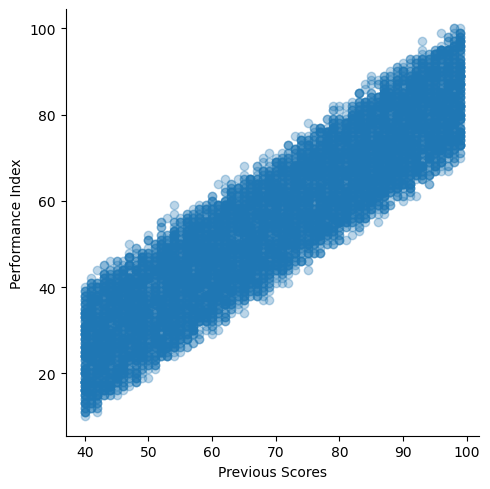

In [24]:
sns.lmplot(x = 'Previous Scores', y = 'Performance Index', data = df, scatter_kws={'alpha' : 0.3})

In [ ]:
Using 2 Variables **Hours Studied** and **Performance Index**

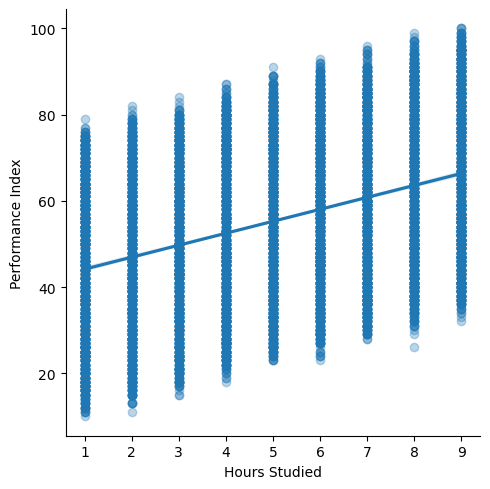

In [32]:
sns.lmplot(x = 'Hours Studied', y = 'Performance Index', data = df, scatter_kws={'alpha' : 0.3})

# Creating the Model


From the visualizations and the correlation analysis, we can observe that **Previous Scores** and **Hours Studied** have a **linear relationship** with the **Performance Index**. This suggests that as the previous scores increase, the performance index also tends to increase in a predictable manner. This linearity indicates that **Previous Scores** is a significant feature that can contribute to predicting the **Performance Index** in our regression model.

To model this relationship, we will use **scikit-learn's Linear Regression** model, which will allow us to predict the **Performance Index** based on the **Previous Scores** along with other features in the dataset.


### Creating Training and Testing Set

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

### Training the model using sklearn

In [29]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [31]:
lm.coef_ 

array([22.87161784, 59.91566786,  0.58171285,  2.3983838 ,  1.71354741])

From the linear regression model, we observe that the **coefficients (w)** for **Hours Studied** (22.87) and **Previous Scores** (59.92) are significantly higher than those for the other variables. This indicates that the **Performance Index** is more dependent on these two features than on the others. 

Thus, **Hours Studied** and **Previous Scores** have a stronger influence on predicting the **Performance Index**, while the impact of other variables is relatively smaller. This insight can help prioritize the key features when making predictions or improving the model further.

In [34]:
lm.intercept_

11.561907234172892


The intercept (bias) of the linear regression model is **11.56**. This means that when all feature values are zero (such as no hours studied, no previous scores, and other variables at their baseline), the predicted **Performance Index** is **11.56**. 

While the intercept may not always have a meaningful interpretation in real-world terms (since having zero hours studied or previous scores may not be realistic), it serves as a baseline value in the regression equation, allowing the model to make predictions when other features are present.


# Predicitons 

Text(0.5, 1.0, 'Evaluation of our LM Model')

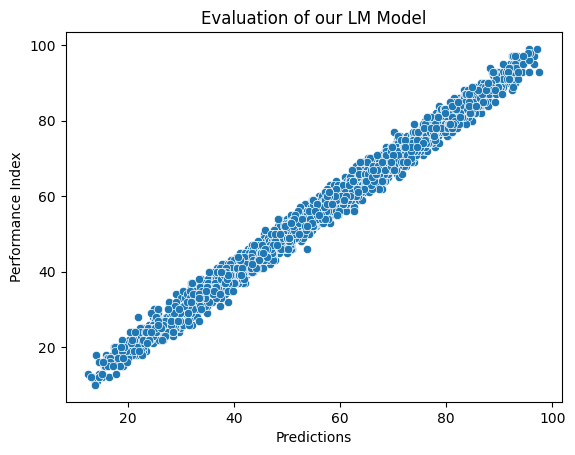

In [35]:
predictions = lm.predict(X_test)

sns.scatterplot(x = predictions,y =  y_test)
plt.xlabel('Predictions')
plt.title('Evaluation of our LM Model')

The resulting plot shows a **linear relationship** between the predicted and actual values. This indicates that the model is making accurate predictions, as the predicted values are closely aligned with the true values. The linear pattern in the scatter plot suggests that the model has learned the relationship between the features and the target variable well, and its predictions are reliable for the given data.

## Accuracy Score

In [36]:
score = lm.score(X_test, y_test)
print(f"R-squared score: {score*100}%")

R-squared score: 98.90110607021137%


# Analyzing the model

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

print('Mean Absolute Error: ', mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error: ', math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error:  1.6090437564045201
Mean Squared Error:  4.06656382409267
Root Mean Squared Error:  2.016572295776343


### Model Evaluation Metrics

We have calculated several evaluation metrics to assess the performance of our linear regression model:

- **Mean Absolute Error (MAE)**: 1.61  
  The MAE indicates that, on average, the model's predictions are off by **1.61** units from the actual **Performance Index**. This means that, for each prediction, the model’s error is typically around 1.61 performance points.

- **Mean Squared Error (MSE)**: 4.07  
  The MSE represents the average of the squared differences between predicted and actual values. This value suggests that when the errors are squared, the average error increases to **4.07**. Squaring the errors penalizes larger discrepancies, which highlights the importance of reducing larger prediction errors.

- **Root Mean Squared Error (RMSE)**: 2.02  
  The RMSE is the square root of the MSE and gives us the magnitude of the typical prediction error in the original units of the target variable (Performance Index). In this case, it shows an average error of **2.02** performance points.

### Interpretation

From these metrics, we can conclude that the model has a **mean error of about 1.61** performance points, with larger errors penalized in the MSE and RMSE calculations. The relatively low MAE and RMSE values indicate that the model's predictions are fairly close to the actual values on average.


## Residuals

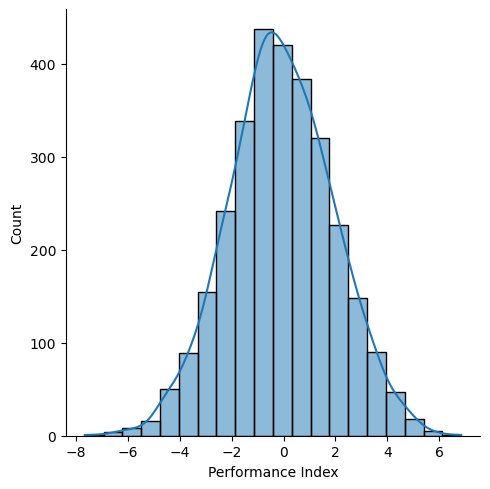

In [38]:
residuals = y_test - predictions
sns.displot(residuals, bins=20, kde=True)

The residuals appear to be randomly scattered around zero, indicating that the model is fitting the data well and there are no significant patterns or issues with the model's performance.